In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Target column
y = df_encoded['deposit_yes']
X = df_encoded.drop(['deposit_yes'], axis=1)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



===== Naive Bayes =====
Accuracy: 0.7236901030004478
Precision: 0.8260869565217391
Recall: 0.5342080599812559

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.90      0.77      1166
        True       0.83      0.53      0.65      1067

    accuracy                           0.72      2233
   macro avg       0.75      0.72      0.71      2233
weighted avg       0.75      0.72      0.71      2233



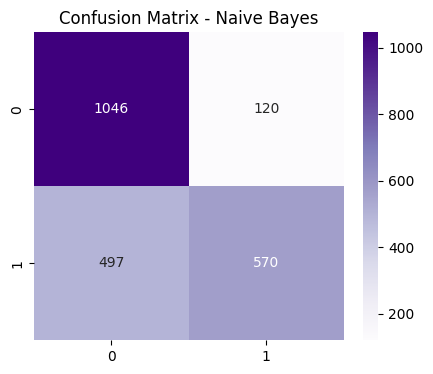

In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
evaluate_model(nb, "Naive Bayes")


===== KNN =====
Accuracy: 0.7666815942678011
Precision: 0.7910447761194029
Recall: 0.6954076850984068

Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.83      0.79      1166
        True       0.79      0.70      0.74      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.76      0.76      2233
weighted avg       0.77      0.77      0.77      2233



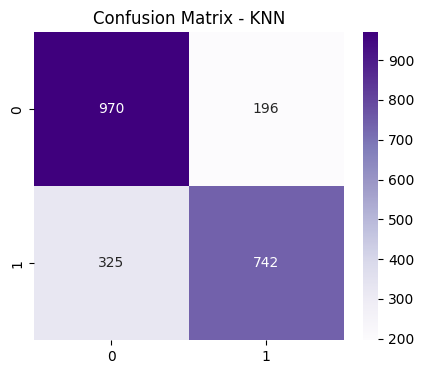

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "KNN")




===== Decision Tree =====
Accuracy: 0.8029556650246306
Precision: 0.8028985507246377
Recall: 0.7788191190253045

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.83      0.81      1166
        True       0.80      0.78      0.79      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



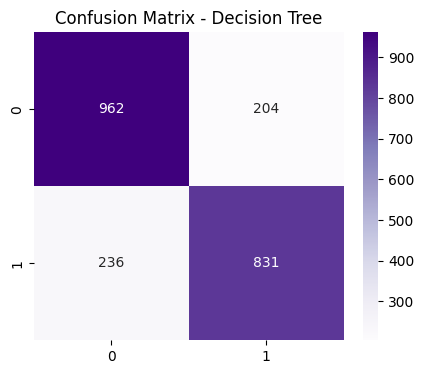

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
evaluate_model(dt, "Decision Tree")



===== Random Forest =====
Accuracy: 0.8235557545902373
Precision: 0.8039747064137308
Recall: 0.8341143392689785

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.81      0.83      1166
        True       0.80      0.83      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



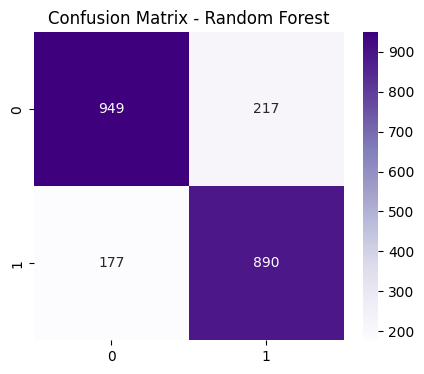

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=8)
evaluate_model(rf, "Random Forest")


===== Logistic Regression =====
Accuracy: 0.8083296014330497
Precision: 0.8111002921129503
Recall: 0.7806935332708529

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.83      0.82      1166
        True       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



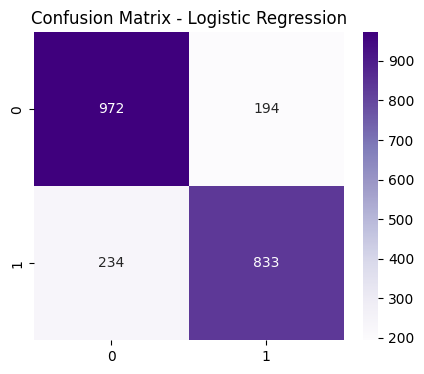

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
evaluate_model(lr, "Logistic Regression")


===== SVM =====
Accuracy: 0.8347514554411106
Precision: 0.8178506375227687
Recall: 0.8416119962511716

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.83      0.84      1166
        True       0.82      0.84      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.84      0.83      2233
weighted avg       0.84      0.83      0.83      2233



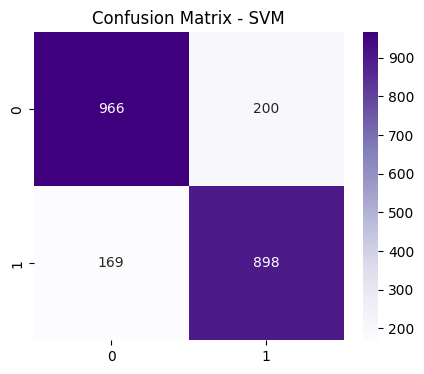

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=2)
evaluate_model(svm, "SVM")

In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu',
                    max_iter=500)
evaluate_model(ann, "ANN")

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

print("Cluster counts:", np.bincount(kmeans.labels_))



Cluster counts: [10888   274]


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance:", pca.explained_variance_ratio_)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

Explained Variance: [0.07713757 0.06079073]


In [23]:
def evaluate_model_pca(model, name):
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)

    print(f"\n===== {name} WITH PCA =====")
    print("Accuracy:", accuracy_score(y_test_pca, y_pred))
    print("Precision:", precision_score(y_test_pca, y_pred))
    print("Recall:", recall_score(y_test_pca, y_pred))

    cm = confusion_matrix(y_test_pca, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix PCA - {name}')
    plt.show()


===== Random Forest WITH PCA =====
Accuracy: 0.6686072548141514
Precision: 0.6752411575562701
Recall: 0.5904404873477038


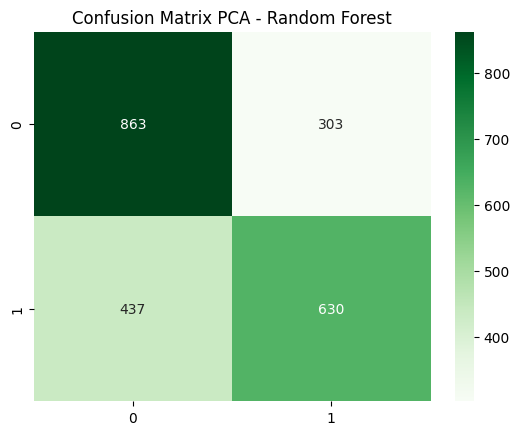


===== Logistic Regression WITH PCA =====
Accuracy: 0.6408419167039857
Precision: 0.6535341830822712
Recall: 0.528584817244611


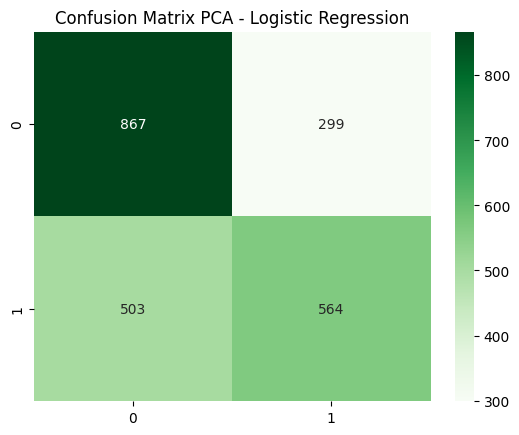


===== SVM WITH PCA =====
Accuracy: 0.6614420062695925
Precision: 0.6789413118527042
Recall: 0.5529522024367385


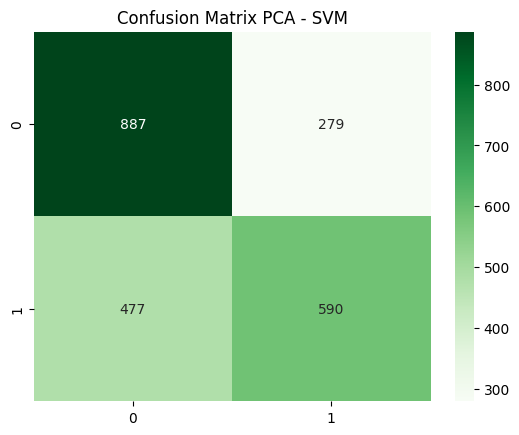


===== ANN WITH PCA =====
Accuracy: 0.6744290192566055
Precision: 0.6778242677824268
Recall: 0.6073102155576382


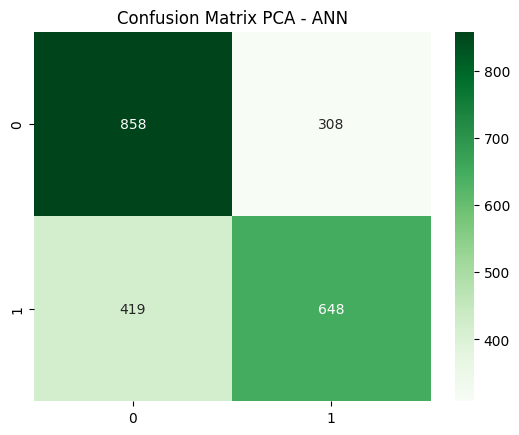

In [24]:
evaluate_model_pca(rf, "Random Forest")
evaluate_model_pca(lr, "Logistic Regression")
evaluate_model_pca(svm, "SVM")
evaluate_model_pca(ann, "ANN")

